In [177]:
'''
#To Google Colab

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Codes/CWRU" 
'''

'\n#To Google Colab\n\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n%cd "/content/drive/MyDrive/Codes/CWRU" \n'

In [178]:
import os
import scipy
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("tab10")

In [179]:
print(f"scipy: {scipy.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns .__version__}")

scipy: 1.4.1
numpy: 1.19.5
pandas: 1.1.5
seaborn: 0.11.2


## CWRU Data Generator

1. Download the CWRU dataset [here.](https://engineering.case.edu/bearingdatacenter/download-data-file)


# Load data

In [180]:
!pip install datasets

In [181]:
from tqdm import tqdm
import datasets
from glob import glob #finds all the pathnames matching a specified pattern according to the rules used
import pandas as pd
import os , scipy.io # os = if you want to manipulate paths
from tqdm import tqdm #create progress bars and estimate TTC (Time To Completion)
import numpy as np
#import torch
from scipy.io import loadmat
import pickle
from scipy import signal
import scipy.stats as ss

path_cwd = os.getcwd() 

data_directory = "\CWRU"

#label directory
'''
Fault Mode Description
0- Health State the normal bearing at 1797 rpm and 0 HP
1- Inner ring 1 0.007 inch inner ring fault at 1797 rpm and 0 HP
2- Inner ring 2 0.014 inch inner ring fault at 1797 rpm and 0 HP
3- Inner ring 3 0.021 inch inner ring fault at 1797 rpm and 0 HP
4- Rolling Element 1 0.007 inch rolling element fault at 1797 rpm and 0 HP
5- Rolling Element 2 0.014 inch rolling element fault at 1797 rpm and 0 HP
6- Rolling Element 3 0.021 inch rolling element fault at 1797 rpm and 0 HP
7- Outer ring 1 0.007 inch outer ring fault at 1797rpm and 0 HP
8- Outer ring 2 0.014 inch outer ring fault at 1797rpm and 0 HP
9- Outer ring 3 0.021 inch outer ring fault at 1797rpm and 0 HP
'''

#label = [1, 2]  # The failure data is labeled 1-9  -> 2 modos de falha para encaixar nos qubits
label = [1, 2, 3, 4, 5, 6, 7, 8, 9]
axis = ["_DE_time", "_FE_time", "_BA_time"]

signal_size = 1024
jump = 50
'''
DE - drive end accelerometer data
FE - fan end accelerometer data
BA - base accelerometer data
'''

'\nDE - drive end accelerometer data\nFE - fan end accelerometer data\nBA - base accelerometer data\n'

In [184]:

def data_load(filename, axisname, label):

    '''
    This function is mainly used to generate test data and training data.
    filename:Data location
    axisname:Select which channel's data,---->"_DE_time","_FE_time","_BA_time"
    '''

    datanumber = axisname.split(".")
    if eval(datanumber[0]) < 100:
        realaxis = "X0" + datanumber[0] + axis[0]
    else:
        realaxis = "X" + datanumber[0] + axis[0]
    fl = loadmat(filename)[realaxis]
    fl = fl.reshape(-1,)
    data = []
    lab = []
    start, end = 0, signal_size
    while end <= fl.shape[0]:
        signal_data = fl[start:end]
        #signal_data = np.fft.fft(signal_data)
        #signal_data = np.abs(signal_data) / len(signal_data)
        #signal_data = signal_data[range(int(signal_data.shape[0] / 2))]
        #signal_data = signal_data.reshape(-1,1)
        #              #mean                 #variance             #rms                            #peak to peak                               #max aplitude
        #signal_data = [np.mean(signal_data),np.var(signal_data), np.sqrt(np.mean(signal_data**2)), np.amax(signal_data)-np.amin(signal_data), np.amax(signal_data) ]        
        
                        # Mean               , Variance          , RMS_amplitude                             , peak to peak                   , max amplit.         ,     CrestFactor                                                ,  Kurtosis                   , Skewness                 ]                                           
        #signal_data = [np.mean(signal_data), np.var(signal_data), np.sqrt(np.mean(signal_data**2)), np.amax(signal_data)-np.amin(signal_data), np.amax(signal_data), np.amax(signal_data)/np.sqrt(np.mean(np.power(signal_data, 2))) ,  ss.kurtosis(signal_data)[0],  ss.skew(signal_data)[0] ]
        signal_data = [np.mean(signal_data), np.var(signal_data), np.sqrt(np.mean(signal_data**2)), np.amax(signal_data)-np.amin(signal_data), np.amax(signal_data), np.amax(signal_data)/np.sqrt(np.mean(np.power(signal_data, 2)))
        ,  ss.kurtosis(signal_data[0]),  ss.skew(signal_data[0]) ]
        data.append(signal_data)
        lab.append(label)
        start += signal_size
        end += signal_size
    return data, lab


In [185]:

#Digital data was collected at 12,000 samples per second

datasetname = ["12k Drive End Bearing Fault Data", "12k Fan End Bearing Fault Data", "48k Drive End Bearing Fault Data",
               "Normal Baseline Data"]
normalname = ["97.mat", "98.mat", "99.mat", "100.mat"]
# For 12k Drive End Bearing Fault Data
dataname1 = ["105.mat", "118.mat", "130.mat", "169.mat", "185.mat", "197.mat", "209.mat", "222.mat",
             "234.mat"]  # 1797rpm
#dataname1 = ["105.mat", "118.mat"]  # 1797rpm

data = []
lab =[]

path1 = os.path.join(path_cwd,"Normal Baseline Data", normalname[0])  
data, lab = data_load(path1, axisname=normalname[0],label=0)  # The label for normal data is 0

for i in tqdm(range(len(dataname1))):
    path1 = os.path.join(path_cwd,"12k Drive End Bearing Fault Data",dataname1[i])
    data1, lab1 = data_load(path1,axisname=dataname1[i],label=label[i])
    data += data1
    lab +=lab1

  

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.96it/s]


In [186]:
np.savez('CWRU_Quantum_8.npz', data=np.array(data), label=np.array(lab))

In [187]:
dataset = np.load('CWRU_Quantum_8.npz')

In [188]:

X = dataset['data']
y = dataset['label']

print(X)

[[ 1.24209681e-02  5.61899448e-03  7.59820698e-02 ...  2.86639285e+00
  -3.00000000e+00  0.00000000e+00]
 [ 1.15889513e-02  4.82543586e-03  7.04254191e-02 ...  3.01257485e+00
  -3.00000000e+00  0.00000000e+00]
 [ 1.46434147e-02  5.92844959e-03  7.83765219e-02 ...  2.70961835e+00
  -3.00000000e+00  0.00000000e+00]
 ...
 [ 4.27066385e-03  2.86213699e-01  5.35006484e-01 ...  5.86201543e+00
  -3.00000000e+00  0.00000000e+00]
 [ 4.59228223e-03  2.91095217e-01  5.39551950e-01 ...  9.16940059e+00
  -3.00000000e+00  0.00000000e+00]
 [ 5.00035291e-03  3.88521474e-01  6.23334964e-01 ...  9.39363372e+00
  -3.00000000e+00  0.00000000e+00]]


In [189]:
print(X.shape)

(1305, 8)


In [190]:
#cwru_features = np.append(X, y, axis = 5)
#print(cwru_features)
'''

data_df = pd.DataFrame(np.hstack((X ,y.reshape(-1,1)) ), columns= ["Mean", "Variance", "RMS_amplitude", "peak to peak", "Max_amplitude", "CrestFactor", "kurtosis", "skewness" ,"category" ])


sns.pairplot(data_df, hue = "category")
'''


'\n\ndata_df = pd.DataFrame(np.hstack((X ,y.reshape(-1,1)) ), columns= ["Mean", "Variance", "RMS_amplitude", "peak to peak", "Max_amplitude", "CrestFactor", "kurtosis", "skewness" ,"category" ])\n\n\nsns.pairplot(data_df, hue = "category")\n'

#PQC

## Hybrid Quantum Classical Machine Learning - Framework 1

* We shall perform health state diagnostics of ball bearings (__CWRU__) with __TensorFlow Quantum (TFQ)__
* For that, we use the framework 1 that is comprised of 4 steps as illustrated in the following figure.


#### Framework 1
* It consists of four steps:
    * Preprocessing data step:
        * It could be the normalization of images to a color-map range or dimensionality reductionof raw multi-sensor data 
        * Then, the processed classical data is encoded into quantum circuits via an encoding schema
    * Parameterized Quantum Circuit (PQC):
        * The quantum encoded data is fed to a PQC
        * It consists of a user defined quantum circuit composed of multiple gates that can accept external, free parameters, and that will be later optimized in the training phase
    * Measurement:
        * It returns the now processed quantum data to classical data
    * Classical (deep) Neural Network:
        * It receives the classical data from the measured PQC
        * It performs the required fault diagnostics / prognostics or RUL prediction

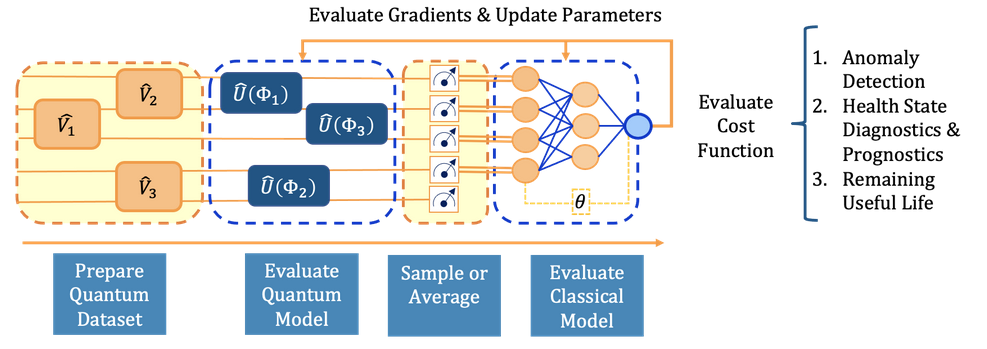

In [191]:
#!pip install --upgrade pip

In [192]:
#!pip install tensorflow==2.7.0

In [193]:
#!pip install tensorflow-quantum==0.7.2

In [194]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from 'C:\\Anaconda\\envs\\tensorflow_quantum\\lib\\site-packages\\pkg_resources\\__init__.py'>

In [195]:
import tensorflow as tf
import tensorflow_quantum as tfq
import cirq  #simulador de circuitos quanticos do tfq
import sympy #biblioteca de matematica simbolica que o tfq utiliza para denominar os parâmetros dentro do PQC que vão ser aprendidos durante o treinamento
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit #to print the circuit

### Classical Data Preprocessing

In [196]:
# Code a function to perform preprocessing on the classical dataset
def prepare_classic_dataset():
    
    #np.load('CWRU_Quantum_Slice.npz') #carregar os dados

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
    
    scaler = MinMaxScaler(feature_range = [0, np.pi])                                                  #o valor de cada característica é classificada como o angulo do qubit, portanto, em vez de normalizar entre 0 e 1, normalizamos entre 0 e pi
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)                                                                  #só o transform, se não vai contaminar os dados de teste
     
    y_train = np.eye(10)[y_train]                                                                      #one hot encoder para otimizar, tem 3 características dos dados de treinamento (0, 1, 2 - modos de falha)
    y_test = np.eye(10)[y_test]

    
    return x_train, x_test, y_train, y_test


In [197]:
# Prepare the classical dataset by calling the previous function

x_train, x_test, y_train, y_test = prepare_classic_dataset()

print(x_train[0])
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

#precisamos codificar as 5 características para qubits

[1.61956594 1.46152269 2.05895785 1.13290918 1.21137884 1.17523119
 0.         0.        ]
(1044, 8)
(1044, 10)
(261, 10)


### Quantum Data Preprocessing: Encoding Schemas
* One of the main challenges when working with quantum circuits and algorithms is to encode real-valued data into qubits
* The simpler schema is called __Angle Encoding__:
    * It generates a circuit that takes as input N qubits set in a |0⟩ state and a N-dimensional real valued vector
    * It outputs a system of N qubits with the classical data encoded into their phases
    * For this, the operation that is performed is as follows:

$$ \vec{x} \rightarrow |\psi\rangle = S(x_0) \otimes S(x_1) \otimes \cdots \otimes S(x_{N-1}) $$ 
    
where $S$ represents the following operation performed to each element of the classical vector:

$$ S(x_i) = \cos \left( \frac{\pi}{2} x_i \right) |0\rangle + \sin \left( \frac{\pi}{2} x_i \right) |1\rangle $$

* Note that this encoding schema uses $N$ qubits to encode a $N$-dimensional vector which values lie in a given interval (e.g., $[0,1]$)
    

In [198]:
# Code a function to perform Angle Encoding of the preprocssed classical data

#Angle encoding é o mais rápido, mas é o menos eficiente.
#mapeamento de um vetor 1x5 para o estado quantico |psi>, a partir do produto tensorial entre cada uma das caracteristicas. 
#codificado dentro do angulo teta do qubit com relação ao |0>
#é como se fosse um Hadamard forçado, onde o angulo que se tem de rotação é proporcional ao valor da característica sendo codificada.

def prepare_quantum_dataset(x):

    #a partir de circuito entre o cirq e o qskit é parecida  
    q = cirq.GridQubit.rect(1, len(x)) #Semelhante ao QuantumRegister on qiskit 
    #no GridQubit cria uma matriz de multiplos qubits, nesse caso um vetor 1x5
    
    #Operações

    #as operações no angle encoding são semelhantes a uma rotação ry
    
    ops = [cirq.ry(2 * x[i]).on(q[i]) for i in range(len(x))] #ry operando "on" qubit i dentro da lista
    #na esfera de blohr que tem no cirq do tfq, o angulo que se define é 2*pi/2. portanto, se quer uma rotação de pi/2 tem que multiplicar o angulo por 2
    #se quer o x multiplicado por meia volta, tem que considerar a volta inteira

    circuit = cirq.Circuit(ops) #equivalente a classe quantumcircuit do qiskit
    
    return circuit
    

[1.61956594 1.46152269 2.05895785 1.13290918 1.21137884 1.17523119
 0.         0.        ]


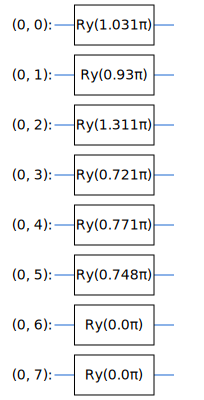

In [199]:
# Do the actual quantum dataset preparation from the preprocessed classical data

x_train_q = [prepare_quantum_dataset(x) for x in x_train] #faz um for pq a função "prepare_quantum_dataset" só processa um registro por vez
x_test_q = [prepare_quantum_dataset(x) for x in x_test]

print(x_train[0])
SVGCircuit(x_train_q[0]) #visualizar o circuito

#os qubits não estão em sobreposição, nem entrelaçados

### Parameterized Quantum Circuit (PQC)

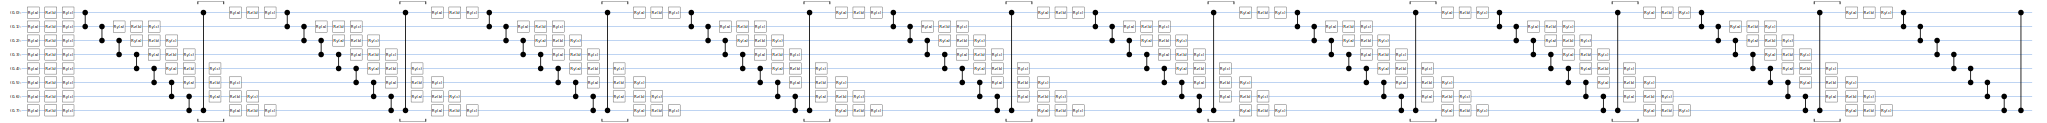

In [240]:
# Implement the PQC

n_layers = 10
qubits = X.shape[1]


params = sympy.symbols('a b c')  #Semelhante ao qskit, são parametros simbolicos que vao ser aprendidos
#vou montar um circuito em que serão feitas 3 rotações em cada um dos qubits
#a = angulo de rotação em y
#b = angulo de rotação em x
#c = angulo de rotação em z

q = cirq.GridQubit.rect(1, qubits)

ops = []  #lista vazia de operações, cria o for para serem executadas nos 5 qubits
'''
for j in range(n_layers):
  for i in range(5):
    ops.append(cirq.ry(params[0]).on(q[i]))  #o angulo é parametrizado pq ele vai ser aprendido no treinamento
    ops.append(cirq.rx(params[1]).on(q[i]))
    ops.append(cirq.rz(params[2]).on(q[i]))
    #ops.append(cirq.H(params[3]).on(q[i]))

'''
for j in range(n_layers):
  for i in range(qubits):
      #Euler rotation
      ops.append(cirq.ry(params[0]).on(q[i]))  #o angulo é parametrizado pq ele vai ser aprendido no treinamento
      ops.append(cirq.rz(params[1]).on(q[i]))
      ops.append(cirq.ry(params[2]).on(q[i]))


  ops.append(cirq.CZ(q[0], q[1]))
  ops.append(cirq.CZ(q[1], q[2]))
  ops.append(cirq.CZ(q[2], q[3]))
  ops.append(cirq.CZ(q[3], q[4]))
  ops.append(cirq.CZ(q[4], q[5]))
  ops.append(cirq.CZ(q[5], q[6]))
  ops.append(cirq.CZ(q[6], q[7]))
  ops.append(cirq.CZ(q[7], q[0]))


#'''

#Arquitetura das portas de emaranhamento
'''
  ops.append(cirq.CNOT(control=q[0], target=q[1]))
  ops.append(cirq.CNOT(control=q[1], target=q[2]))
  ops.append(cirq.CNOT(control=q[2], target=q[3]))
  ops.append(cirq.CNOT(control=q[3], target=q[4]))
  ops.append(cirq.CNOT(control=q[4], target=q[5]))
  ops.append(cirq.CNOT(control=q[5], target=q[6]))
  ops.append(cirq.CNOT(control=q[6], target=q[7]))
  ops.append(cirq.CNOT(control=q[7], target=q[0]))
'''

'''
  #Without two-qubit gates parameterized
  ops.append(cirq.CZ(q[0], q[1]))
  ops.append(cirq.CZ(q[1], q[2]))
  ops.append(cirq.CZ(q[2], q[3]))
  ops.append(cirq.CZ(q[3], q[4]))
  ops.append(cirq.CZ(q[4], q[5]))
  ops.append(cirq.CZ(q[5], q[6]))
  ops.append(cirq.CZ(q[6], q[7]))
  ops.append(cirq.CZ(q[7], q[0]))
'''



'''
  ops.append(cirq.ISWAP(q[0], q[1]))
  ops.append(cirq.ISWAP(q[1], q[2]))
  ops.append(cirq.ISWAP(q[2], q[3]))
  ops.append(cirq.ISWAP(q[3], q[4]))
  ops.append(cirq.ISWAP(q[4], q[5]))
  ops.append(cirq.ISWAP(q[5], q[6]))
  ops.append(cirq.ISWAP(q[6], q[7]))  
  ops.append(cirq.ISWAP(q[7], q[0]))
'''
model_circuit = cirq.Circuit(ops)

SVGCircuit(model_circuit)  #SVG é a imagem vetorizada do circuito

#Verificar a matriz resultante do circuito.

### Measurement, Classical Neural Net and Hybrid Model

In [241]:
# Code the Hybrid Quantum-Classical Neural Net:
from tensorflow.keras.layers import Input

#criar o modelo sequencial
#iniciou com 5 características, mas sai com 3 - portanto a avaliação na rede é dessas características

nn = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'relu'), 
tf.keras.layers.Dense(10,activation = 'sigmoid')]) #sigmoid // softmax
                          
#nn = tf.keras.Sequential([tf.keras.layers.Dense(10,activation = 'softmax')])

#Camada de entrada, define o shape para ser determinado depois; 
#para poder encaixar circ quanticos ele precisa serializar a string em forma de bits - o ponto de entrada é um bitstring - isso é depois transformado para tensor (isso é uma deficiencia do tensorflow)  
circuit_input = tf.keras.Input(shape = (), dtype = tf.string, name = 'circuits_input')

#Criação das operações de medição 
#O cirq faz as medições a partir da operação de Pauli Z 

measurement_ops = [cirq.Z(q[i]) for i in range(qubits)] 

#cria a camada de circuito quantica, a partir de agora usa tfq - circuito agregado as operações de medição
circuit_layer = tfq.layers.PQC(model_circuit, measurement_ops)


#Junta tudo
#a entrada é quantica, a saída é o nn - PQC do circuit input; 
model = tf.keras.Model(inputs = circuit_input, outputs = nn(circuit_layer(circuit_input)))

model.summary()

print(circuit_layer)

Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
circuits_input (InputLayer)  [(None,)]                 0         
_________________________________________________________________
pqc_72 (PQC)                 (None, 8)                 3         
_________________________________________________________________
sequential_81 (Sequential)   (None, 10)                1910      
Total params: 1,913
Trainable params: 1,913
Non-trainable params: 0
_________________________________________________________________


### Training the Hybrid Quantum - Classical Model

In [242]:
# define our early stopping
'''
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)
'''

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', mode='max', patience = 20)

In [243]:
# Training

last_value = []
best_value = []

from tensorflow.keras import optimizers
#o tf assume que todos os parametros vao ser otimizados, no pytorch nao (é mais flexivel)
import time
start = time.time()

for i in range(5):
    
    # Code the Hybrid Quantum-Classical Neural Net:
    #from tensorflow.keras.layers import Input

    #criar o modelo sequencial
    #iniciou com 5 características, mas sai com 3 - portanto a avaliação na rede é dessas características

    nn = tf.keras.Sequential([tf.keras.layers.Dense(100,activation = 'relu'), 
    tf.keras.layers.Dense(10,activation = 'sigmoid')]) #sigmoid // softmax

    #nn = tf.keras.Sequential([tf.keras.layers.Dense(10,activation = 'softmax')])

    #Camada de entrada, define o shape para ser determinado depois; 
    #para poder encaixar circ quanticos ele precisa serializar a string em forma de bits - o ponto de entrada é um bitstring - isso é depois transformado para tensor (isso é uma deficiencia do tensorflow)  
    circuit_input = tf.keras.Input(shape = (), dtype = tf.string, name = 'circuits_input')

    #Criação das operações de medição 
    #O cirq faz as medições a partir da operação de Pauli Z 

    measurement_ops = [cirq.Z(q[i]) for i in range(qubits)] 

    #cria a camada de circuito quantica, a partir de agora usa tfq - circuito agregado as operações de medição
    circuit_layer = tfq.layers.PQC(model_circuit, measurement_ops)


    #Junta tudo
    #a entrada é quantica, a saída é o nn - PQC do circuit input; 
    model = tf.keras.Model(inputs = circuit_input, outputs = nn(circuit_layer(circuit_input)))

    #model.summary()

    print(circuit_layer)

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(x = tfq.convert_to_tensor(x_train_q), y = y_train, epochs = 100, verbose = 1, validation_split = 0.1) #, callbacks=[es])
    
    acc = history.history['val_accuracy']
    bestacc = max(acc)
    best_value.append(bestacc)
    last_value.append(acc[99])

    i+=1


    # Evaluate the model on the test dataset
    loss, acc = model.evaluate(tfq.convert_to_tensor(x_test_q), y_test, verbose = 2)
    
    #acc_matrix.append(acc)

end = time.time()
print("Run time:", end - start)


Train on 939 samples, validate on 105 samples
Epoch 1/100
939/939 [==============================] - 5s 5ms/sample - loss: 1.8451 - accuracy: 0.2907 - val_loss: 1.5594 - val_accuracy: 0.2952
Epoch 2/100
939/939 [==============================] - 5s 5ms/sample - loss: 1.2633 - accuracy: 0.4462 - val_loss: 1.1628 - val_accuracy: 0.5238
Epoch 3/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.9497 - accuracy: 0.5729 - val_loss: 1.0211 - val_accuracy: 0.6190
Epoch 4/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.7151 - accuracy: 0.7412 - val_loss: 0.7328 - val_accuracy: 0.8095
Epoch 5/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.5402 - accuracy: 0.8104 - val_loss: 0.5728 - val_accuracy: 0.8190
Epoch 6/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.4483 - accuracy: 0.8679 - val_loss: 0.5369 - val_accuracy: 0.8190
Epoch 7/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.4149 

939/939 [==============================] - 5s 6ms/sample - loss: 0.0911 - accuracy: 0.9702 - val_loss: 0.3033 - val_accuracy: 0.9429
Epoch 57/100
939/939 [==============================] - 6s 6ms/sample - loss: 0.1064 - accuracy: 0.9649 - val_loss: 0.1386 - val_accuracy: 0.9429
Epoch 58/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.1049 - accuracy: 0.9702 - val_loss: 0.1967 - val_accuracy: 0.9429
Epoch 59/100
939/939 [==============================] - 5s 6ms/sample - loss: 0.0854 - accuracy: 0.9766 - val_loss: 0.1664 - val_accuracy: 0.9333
Epoch 60/100
939/939 [==============================] - 5s 6ms/sample - loss: 0.0809 - accuracy: 0.9776 - val_loss: 0.2425 - val_accuracy: 0.9238
Epoch 61/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.0817 - accuracy: 0.9723 - val_loss: 0.1953 - val_accuracy: 0.9524
Epoch 62/100
939/939 [==============================] - 5s 6ms/sample - loss: 0.0878 - accuracy: 0.9712 - val_loss: 0.1959 - val_accuracy

939/939 [==============================] - 5s 5ms/sample - loss: 0.2078 - accuracy: 0.9478 - val_loss: 0.2377 - val_accuracy: 0.9524
Epoch 12/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.2165 - accuracy: 0.9478 - val_loss: 0.2415 - val_accuracy: 0.9333
Epoch 13/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.1909 - accuracy: 0.9446 - val_loss: 0.2196 - val_accuracy: 0.9429
Epoch 14/100
939/939 [==============================] - 4s 5ms/sample - loss: 0.1832 - accuracy: 0.9510 - val_loss: 0.1801 - val_accuracy: 0.9619
Epoch 15/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.1673 - accuracy: 0.9563 - val_loss: 0.1883 - val_accuracy: 0.9429
Epoch 16/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.1678 - accuracy: 0.9521 - val_loss: 0.2196 - val_accuracy: 0.9429
Epoch 17/100
939/939 [==============================] - 5s 5ms/sample - loss: 0.1624 - accuracy: 0.9531 - val_loss: 0.1701 - val_accuracy

Epoch 67/100
939/939 [==============================] - 7s 7ms/sample - loss: 0.0854 - accuracy: 0.9712 - val_loss: 0.1572 - val_accuracy: 0.9238
Epoch 68/100
939/939 [==============================] - 7s 8ms/sample - loss: 0.0751 - accuracy: 0.9755 - val_loss: 0.1248 - val_accuracy: 0.9524
Epoch 69/100
939/939 [==============================] - 7s 8ms/sample - loss: 0.0613 - accuracy: 0.9840 - val_loss: 0.0862 - val_accuracy: 0.9619
Epoch 70/100
939/939 [==============================] - 7s 8ms/sample - loss: 0.0577 - accuracy: 0.9851 - val_loss: 0.1015 - val_accuracy: 0.9619
Epoch 71/100
939/939 [==============================] - 7s 8ms/sample - loss: 0.0635 - accuracy: 0.9840 - val_loss: 0.1476 - val_accuracy: 0.9524
Epoch 72/100
939/939 [==============================] - 7s 8ms/sample - loss: 0.0685 - accuracy: 0.9808 - val_loss: 0.1225 - val_accuracy: 0.9524
Epoch 73/100
939/939 [==============================] - 8s 8ms/sample - loss: 0.0653 - accuracy: 0.9787 - val_loss: 0.1175 -

939/939 [==============================] - 10s 11ms/sample - loss: 0.2634 - accuracy: 0.8956 - val_loss: 0.2708 - val_accuracy: 0.9143
Epoch 22/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.2247 - accuracy: 0.9233 - val_loss: 0.2892 - val_accuracy: 0.9048
Epoch 23/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.2106 - accuracy: 0.9318 - val_loss: 0.3170 - val_accuracy: 0.8762
Epoch 24/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.2144 - accuracy: 0.9223 - val_loss: 0.2686 - val_accuracy: 0.8952
Epoch 25/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.2121 - accuracy: 0.9244 - val_loss: 0.2264 - val_accuracy: 0.9143
Epoch 26/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.2003 - accuracy: 0.9255 - val_loss: 0.3145 - val_accuracy: 0.8857
Epoch 27/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.2133 - accuracy: 0.9297 - val_loss: 0.2131 -

939/939 [==============================] - 10s 10ms/sample - loss: 0.0928 - accuracy: 0.9670 - val_loss: 0.1797 - val_accuracy: 0.9524
Epoch 77/100
939/939 [==============================] - 11s 11ms/sample - loss: 0.0899 - accuracy: 0.9712 - val_loss: 0.1842 - val_accuracy: 0.9238
Epoch 78/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.0780 - accuracy: 0.9787 - val_loss: 0.1657 - val_accuracy: 0.9619
Epoch 79/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.0977 - accuracy: 0.9681 - val_loss: 0.1597 - val_accuracy: 0.9524
Epoch 80/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.0910 - accuracy: 0.9712 - val_loss: 0.1650 - val_accuracy: 0.9333
Epoch 81/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1123 - accuracy: 0.9617 - val_loss: 0.1877 - val_accuracy: 0.9143
Epoch 82/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1057 - accuracy: 0.9670 - val_loss: 0.1659 - 

939/939 [==============================] - 10s 10ms/sample - loss: 0.1819 - accuracy: 0.9478 - val_loss: 0.1962 - val_accuracy: 0.9524
Epoch 31/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1639 - accuracy: 0.9606 - val_loss: 0.2016 - val_accuracy: 0.9619
Epoch 32/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1751 - accuracy: 0.9489 - val_loss: 0.2275 - val_accuracy: 0.9333
Epoch 33/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1616 - accuracy: 0.9617 - val_loss: 0.1796 - val_accuracy: 0.9524
Epoch 34/100
939/939 [==============================] - 11s 11ms/sample - loss: 0.1470 - accuracy: 0.9670 - val_loss: 0.2114 - val_accuracy: 0.9143
Epoch 35/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.1624 - accuracy: 0.9563 - val_loss: 0.1898 - val_accuracy: 0.9429
Epoch 36/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.1513 - accuracy: 0.9617 - val_loss: 0.1771 - 

939/939 [==============================] - 9s 10ms/sample - loss: 0.0864 - accuracy: 0.9691 - val_loss: 0.1300 - val_accuracy: 0.9619
Epoch 86/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.0860 - accuracy: 0.9723 - val_loss: 0.1138 - val_accuracy: 0.9714
Epoch 87/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.0864 - accuracy: 0.9734 - val_loss: 0.1115 - val_accuracy: 0.9619
Epoch 88/100
939/939 [==============================] - 11s 11ms/sample - loss: 0.0838 - accuracy: 0.9766 - val_loss: 0.1597 - val_accuracy: 0.9238
Epoch 89/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1103 - accuracy: 0.9649 - val_loss: 0.1688 - val_accuracy: 0.9524
Epoch 90/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1038 - accuracy: 0.9617 - val_loss: 0.1356 - val_accuracy: 0.9333
Epoch 91/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.0821 - accuracy: 0.9776 - val_loss: 0.1468 - va

939/939 [==============================] - 9s 10ms/sample - loss: 0.1708 - accuracy: 0.9446 - val_loss: 0.3028 - val_accuracy: 0.8857
Epoch 40/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1974 - accuracy: 0.9382 - val_loss: 0.2887 - val_accuracy: 0.9048
Epoch 41/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1785 - accuracy: 0.9393 - val_loss: 0.3033 - val_accuracy: 0.8952
Epoch 42/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1905 - accuracy: 0.9350 - val_loss: 0.2918 - val_accuracy: 0.9048
Epoch 43/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1834 - accuracy: 0.9414 - val_loss: 0.3641 - val_accuracy: 0.8667
Epoch 44/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.1619 - accuracy: 0.9510 - val_loss: 0.2828 - val_accuracy: 0.9048
Epoch 45/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1835 - accuracy: 0.9382 - val_loss: 0.2763 - 

939/939 [==============================] - 10s 11ms/sample - loss: 0.1059 - accuracy: 0.9734 - val_loss: 0.2647 - val_accuracy: 0.9333
Epoch 95/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.0981 - accuracy: 0.9712 - val_loss: 0.2358 - val_accuracy: 0.9429
Epoch 96/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.0930 - accuracy: 0.9734 - val_loss: 0.2970 - val_accuracy: 0.9143
Epoch 97/100
939/939 [==============================] - 10s 10ms/sample - loss: 0.1012 - accuracy: 0.9734 - val_loss: 0.3353 - val_accuracy: 0.9238
Epoch 98/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.0976 - accuracy: 0.9766 - val_loss: 0.2597 - val_accuracy: 0.9048
Epoch 99/100
939/939 [==============================] - 10s 11ms/sample - loss: 0.1081 - accuracy: 0.9712 - val_loss: 0.3123 - val_accuracy: 0.8857
Epoch 100/100
939/939 [==============================] - 9s 10ms/sample - loss: 0.1330 - accuracy: 0.9521 - val_loss: 0.2342 -

In [244]:
print("MaxBest: ",max(best_value))
print("MeanBest: ",np.mean(best_value))

print("MaxLast:", max(last_value))
print("MeanLast: ",np.mean(last_value))

MaxBest:  0.9809524
MeanBest:  0.9657143
MaxLast: 0.9714286
MeanLast:  0.94285715


### Testing the Hybrid Quantum - Classical Model

In [ ]:
# Evaluate the model on the test dataset
loss, acc = model.evaluate(tfq.convert_to_tensor(x_test_q), y_test, verbose = 2)

y_test_ne = np.argmax(y_test, axis = 1)
y_test_pred_ne = np.argmax(model.predict(tfq.convert_to_tensor(x_test_q)), axis = 1)

cm = confusion_matrix(y_test_ne, y_test_pred_ne)

print(cm)

392/392 - 6s - loss: 0.2527 - accuracy: 0.9311
[[78  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 34  1  0  0  0  0  0]
 [ 0  0  0  1 33  2  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 1  0  0  0  0  0  0 47  0  0]
 [ 0  2  5  0  0  1  5  3 21  0]
 [ 0  1  0  0  0  3  0  0  0 26]]


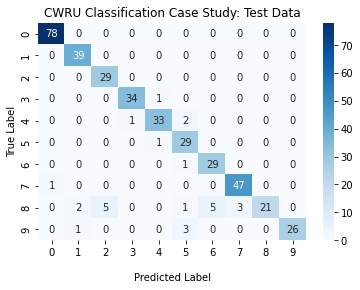

In [ ]:

# Plot the confusion matrix

import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('CWRU Classification Case Study: Test Data');
ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


#from sklearn.metrics import plot_confusion_matrix
#from utils import plot_confusion_matrix

#plot_confusion_matrix(cm, ['ND', 'OR', 'IR'], 0, title = 'CWRU Classification Case Study: Test Data', normalize = True)


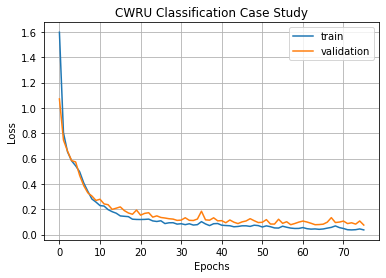

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("CWRU Classification Case Study")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

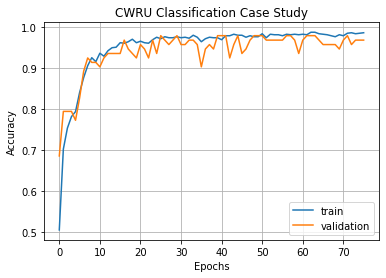

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("CWRU Classification Case Study")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()
plt.show()

#CLASSICAL MLP


In [225]:
print(x_train.shape)
feature_vector_length = x_train.shape[1]
feature_vector_length

(1044, 8)


8

In [226]:
from sklearn.neural_network import MLPClassifier

In [227]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [228]:
#configurate the model

model = tensorflow.keras.models.Sequential()

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

model.add(Dense(1024, input_shape=input_shape, activation='relu'))
#model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

Feature shape: (8,)


In [229]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [230]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

In [231]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', mode='max', patience = 10)

In [232]:
last_value = []
best_value = []

from tensorflow.keras import optimizers
#o tf assume que todos os parametros vao ser otimizados, no pytorch nao (é mais flexivel)
import time
start = time.time()

for i in range(1):

  history = model.fit(x_train, y_train, batch_size = 256, epochs = 100, validation_split=0.1, verbose=1)#, validation_data=(x_test, y_test))

  acc = history.history['val_accuracy']
  bestacc = max(acc)
  best_value.append(bestacc)
  last_value.append(acc[99])

  i+=1


  
  #acc_matrix.append(acc)

end = time.time()
print("Run time:", end - start)

Train on 939 samples, validate on 105 samples
Epoch 1/100
939/939 [==============================] - 1s 1ms/sample - loss: 0.6407 - accuracy: 0.7557 - val_loss: 0.5619 - val_accuracy: 0.9000
Epoch 2/100
939/939 [==============================] - 0s 133us/sample - loss: 0.5370 - accuracy: 0.9000 - val_loss: 0.4721 - val_accuracy: 0.9000
Epoch 3/100
939/939 [==============================] - 0s 52us/sample - loss: 0.4573 - accuracy: 0.9000 - val_loss: 0.4082 - val_accuracy: 0.9000
Epoch 4/100
939/939 [==============================] - 0s 92us/sample - loss: 0.4006 - accuracy: 0.9000 - val_loss: 0.3668 - val_accuracy: 0.9000
Epoch 5/100
939/939 [==============================] - 0s 136us/sample - loss: 0.3637 - accuracy: 0.9000 - val_loss: 0.3417 - val_accuracy: 0.9000
Epoch 6/100
939/939 [==============================] - 0s 126us/sample - loss: 0.3408 - accuracy: 0.9000 - val_loss: 0.3258 - val_accuracy: 0.9000
Epoch 7/100
939/939 [==============================] - 0s 39us/sample - loss

939/939 [==============================] - 0s 86us/sample - loss: 0.1323 - accuracy: 0.9531 - val_loss: 0.1313 - val_accuracy: 0.9514
Epoch 57/100
939/939 [==============================] - 0s 231us/sample - loss: 0.1305 - accuracy: 0.9543 - val_loss: 0.1298 - val_accuracy: 0.9514
Epoch 58/100
939/939 [==============================] - 0s 36us/sample - loss: 0.1289 - accuracy: 0.9547 - val_loss: 0.1283 - val_accuracy: 0.9524
Epoch 59/100
939/939 [==============================] - 0s 72us/sample - loss: 0.1273 - accuracy: 0.9554 - val_loss: 0.1267 - val_accuracy: 0.9524
Epoch 60/100
939/939 [==============================] - 0s 82us/sample - loss: 0.1257 - accuracy: 0.9553 - val_loss: 0.1251 - val_accuracy: 0.9524
Epoch 61/100
939/939 [==============================] - 0s 183us/sample - loss: 0.1241 - accuracy: 0.9556 - val_loss: 0.1235 - val_accuracy: 0.9524
Epoch 62/100
939/939 [==============================] - 0s 24us/sample - loss: 0.1226 - accuracy: 0.9557 - val_loss: 0.1220 - val

In [233]:
print("MaxBest: ",max(best_value))
print("MeanBest: ",np.mean(best_value))

print("MaxLast:", max(last_value))
print("MeanLast: ",np.mean(last_value))

MaxBest:  0.9695238
MeanBest:  0.9695238
MaxLast: 0.9695238
MeanLast:  0.9695238


In [234]:
score = model.evaluate(x_test, y_test)


261/261 [==============================] - 0s 422us/sample - loss: 0.0897 - accuracy: 0.9693


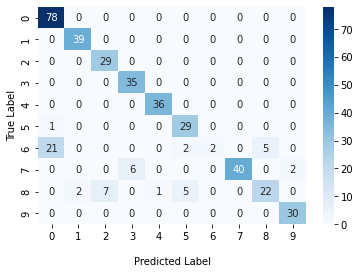

In [ ]:
previsao = model.predict(x_test)

cm = confusion_matrix(y_test.argmax(1), previsao.argmax(1))

# Plot the confusion matrix

import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.4g')


ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label');

plt.show()

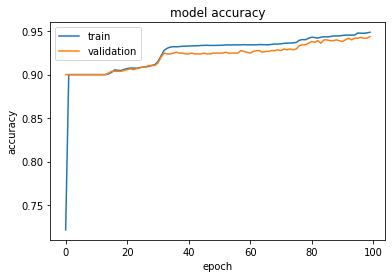

In [80]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



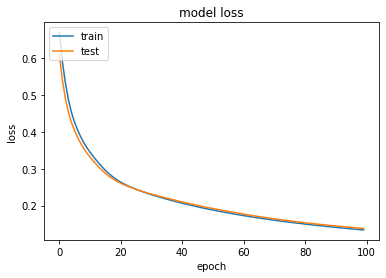

In [81]:
# Plota gráfico de Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#FRAMEWORK 2


In [ ]:
dataset = np.load('CWRU_preprocess_STFT.npz')

In [ ]:
X = dataset['data']
y = dataset['label']

In [ ]:
print(X.shape)

(1305, 33, 33)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=33).
  


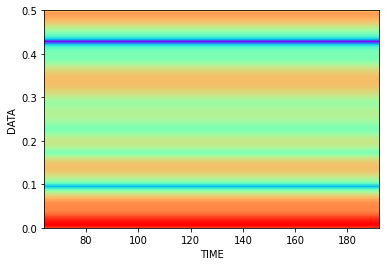

In [ ]:
import matplotlib.pyplot  as plt
plt.specgram(X[1], Fs=1, cmap="rainbow")
plt.xlabel("TIME")
plt.ylabel("DATA")
plt.show()

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.1/112.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.8/943.8 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import numpy as np
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile , assemble #transpile: otimização do circuito, assemble: monta o circuito
from qiskit.visualization import *

torch.manual_seed(1)

#### Preprocessing Stage
* First, we load the image data using pytorch's dataloaders:
    * They are very usefull functions that allow us to load, manipulate, transform and deliver data to deep learning pipelines in a very compact way
* The images are of size 3x227x227:
    * That is, 3 channels (color RGB)
    * with 227 pixels in a square aspect ratio
* Then, We apply some transformations to the image in order to work with it more easily:
    * Reduce the size of the images and of power of 2 (note that this is _not_ neccesary, but it makes the computations easier)
    * Transform the images from numpy (their input format) to torch tensor format
    * Normalize the images

* __Train dataset preparation:__

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [ ]:
# Operations that we will perform on the images when we load them. It saves time in the pipeline!
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Resize(28),
                               transforms.Grayscale(num_output_channels = 1),
                               transforms.Normalize(0.67, 0.13)]) #média e desvio padrão das imagens que estão sendo tratadas

train_dataset = datasets.ImageFolder(x_train, transform = transform)

train_dataset = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), 200, replace = False))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1, shuffle = True)


ValueError: ignored